# **Projet 3 - <span style="color:#35B890">Concevoir une application au service de la santé publique</span>**

**<span style="color:#35B890">Objectif de la mission</span>** - Réponse à l'AAP de <a href="https://www.santepubliquefrance.fr/">Santé public France</a> concernant une idée d'application en lien avec l'alimentation.

**<span style="color:#35B890">Source des données</span>** - Les données sont issues de l'association <a href="https://world.openfoodfacts.org/">Open Food Facts</a> qui a pour but de mettre à disposition des consommateurs les données des produits alimentaires. Pour une meilleure compréhension des données, une description est <a href="">disponible à cette page</a>.

**<span style="color:#35B890">Présentation de l'application choisie</span>**
<p>Dans le cadre du développement de nouveaux produits destinés à améliorer la qualité de vie et le bien-être de la population, le service R&D développe un outil permetant de rééquilibrer les habitudes alimentaire. Le but est de restranscrire les repas en informations nutritionnelles afin de proposer des menus plus équilibrés. Les produits issus de territoires français seront utilisés pour la conception des menus ainsi que la qualité des nutriments.</p>

**<span style="color:#35B890">Les différentes étapes:</span>**
1. Collecte des données (repas consommés)
2. Transcription en valeurs nutrionnelles
3. Comparaison entre la consommation et les Apports Nutritionnels Conseillés (ANC)
4. Analyse des habitudes de consommation (Régime alimentaire, allergies, ...)
5. Proposition de menus respectants les ANC et les Apports Journaliers recommandés (AJR)

---

**<span style="color:#35B890">Objectif du notebook</span> - Concevoir une base de données exploitable pour la réalisation du projet d'application**

**Notebook de nettoyage:**
1. Description des données
2. Nettoyage des données
   1. *Suppression des données inexploitables*
   2. *Sélection des produits issus des territoires français*
   3. *Traitement des informations produit*
      1. *Sélection des variables pertinentes*
      2. *Traitement des données*
   4. *Traitement des informations nutritionnelles*
      1. *Sélection des variables pertinentes*
      2. *Traitement des données*
3. Imputation des données manquantes (nutriments)
   1. *Moyenne par colonne*
   2. *Moyenne par catégorie*
   3. *KNN-Imputer*

**Notebook d'analyse:**

4. Analyse statistique des données

## **0. Importation des librairies et des données**
---

In [1]:
# import os
# Importing python librairies
import pandas as pd
import numpy as np
import sklearn as sl
from sklearn.impute import KNNImputer
from scipy.stats import zscore
import scipy.stats as stats
from wordcloud import WordCloud
import random
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# from matplotlib.ticker import ScalarFormatter

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import davies_bouldin_score
#Classes pour le clustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Import the dataset MAC
#food = "/Users/remi/Documents/FoodFact/foodfact.csv"
#df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [3]:
# Import the dataset PC
food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact_final.csv"
df_food = pd.read_csv(food, sep=",", low_memory=False)

### Charte graphique

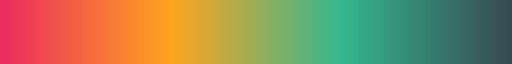

In [4]:
# Define the color
first_color = "#EB2D5F"  # Couleur pour les valeurs inférieures
under_color = '#ffa51f'  # Couleur pour les valeurs inférieures
over_color = '#384B52'   # Couleur pour les valeurs supérieures
# Create a personal color map 
colors = [first_color,under_color, '#35B890', over_color]
n_bins = 100
cmap_name = 'custom_colormap'
palette = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
palette

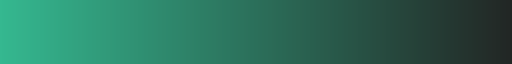

In [5]:
# Continuous colour palette for the various graphics
palette_b = sns.dark_palette("#35B890", reverse=True, as_cmap=True)
palette_b

In [6]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=len(df_food.isnull().sum()),as_cmap=False)
palette_map

[(0.13521666301722216, 0.15155479605253716, 0.1443874221608451),
 (0.13977361826350795, 0.18732036978734143, 0.17076034515329036),
 (0.14433057350979375, 0.22308594352214572, 0.1971332681457356),
 (0.14888752875607952, 0.25885151725695, 0.22350619113818082),
 (0.15344448400236532, 0.29461709099175426, 0.24987911413062608),
 (0.15800143924865112, 0.33038266472655853, 0.27625203712307134),
 (0.16255839449493692, 0.3661482384613628, 0.30262496011551654),
 (0.16711534974122272, 0.40191381219616706, 0.3289978831079618),
 (0.1716723049875085, 0.43767938593097133, 0.35537080610040706),
 (0.1762292602337943, 0.4734449596657757, 0.38174372909285226),
 (0.1807862154800801, 0.50921053340058, 0.4081166520852975),
 (0.18534317072636586, 0.5449761071353842, 0.4344895750777428),
 (0.18990012597265166, 0.5807416808701885, 0.46086249807018803),
 (0.19445708121893746, 0.6165072546049928, 0.48723542106263323),
 (0.19901403646522325, 0.652272828339797, 0.5136083440550785),
 (0.20357099171150905, 0.6880384020746013, 0.5399812670475237),
 (0.20784313725490197, 0.7215686274509804, 0.5647058823529412)]

In [7]:
# Reverse the order of colours in the palette list
palette_map = list(reversed(palette_map))

## **1. Description des données**
***

In [8]:
# Describe dataset
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64302 entries, 0 to 64301
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         64302 non-null  int64  
 1   product_name                 64302 non-null  object 
 2   brands                       64037 non-null  object 
 3   allergens                    64302 non-null  int64  
 4   additives_fr                 64302 non-null  int64  
 5   ingredients_from_palm_oil_n  64302 non-null  int64  
 6   nutrition_grade_fr           61073 non-null  object 
 7   pnns_groups_2                42570 non-null  object 
 8   energy_100g                  64302 non-null  float64
 9   fat_100g                     64302 non-null  float64
 10  saturated-fat_100g           64302 non-null  float64
 11  carbohydrates_100g           64302 non-null  float64
 12  sugars_100g                  64302 non-null  float64
 13  fiber_100g      

In [9]:
# View random data
df_food.sample(3)

,code,product_name,brands,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
57043,6091309050531,Rhum,Chamarel,0,0,0,E,NaN,84.0,13.48,30.0,22.96,50.0,0.00,50.0,40.0000,30.0
32884,3350031627590,Riz Thaï 10 minutes 500 g Monoprix,Monoprix,0,0,0,A,Cereals,1546.0,1.00,0.1,80.00,0.0,1.60,8.0,0.0254,-2.0
54068,5202853102077,Authentique Feta,Roussas,1,0,0,D,Cheese,1173.0,24.20,15.0,0.20,0.0,0.06,16.0,3.0000,18.0


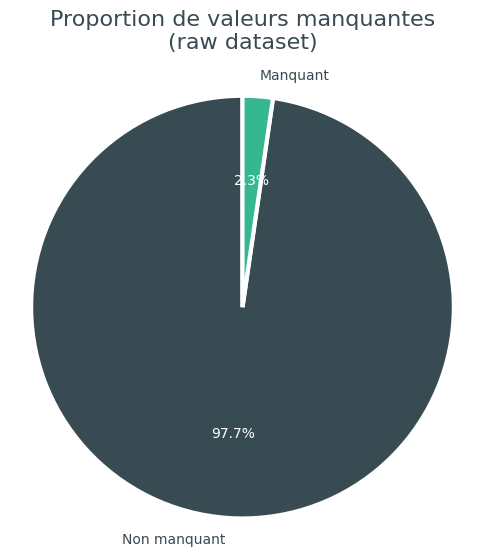

In [10]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de valeurs manquantes\n(raw dataset)",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

In [11]:
df_food.describe()

,code,allergens,additives_fr,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,6.430200e+04,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000,64302.000000
mean,3.853638e+12,0.316724,0.421698,0.053373,1111.154367,13.376874,5.396250,25.164860,13.316109,2.548717,7.744765,1.144221,8.851016
std,5.218483e+12,0.465202,0.493835,0.224778,772.596489,15.595128,8.365632,25.064649,18.715819,4.251038,7.843425,3.875282,9.004834
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,3.242272e+12,0.000000,0.000000,0.000000,427.000000,1.300000,0.300000,4.320000,1.000000,0.100000,1.800000,0.080000,1.000000
50%,3.329770e+12,0.000000,0.000000,0.000000,1033.000000,7.200000,2.000000,14.200000,4.200000,1.100000,6.000000,0.580000,9.000000
75%,3.700134e+12,1.000000,1.000000,0.000000,1645.000000,21.400000,7.400000,45.000000,17.800000,3.000000,11.000000,1.260000,16.000000
max,3.661112e+14,1.000000,1.000000,1.000000,3774.000000,99.900000,99.000000,99.900000,99.900000,99.000000,99.000000,99.822000,40.000000


## **2. Nettoyage des données**
***

In [12]:
# Rename column energy
df_food = df_food.rename(columns={"energy_100g":"energy_100g (kJ)"})

In [13]:
# Instantiation of nutrient columns
col_nutri = df_food.columns[df_food.columns.str.contains("_100")]

## Analyse des nutriments

### Analyse univariée

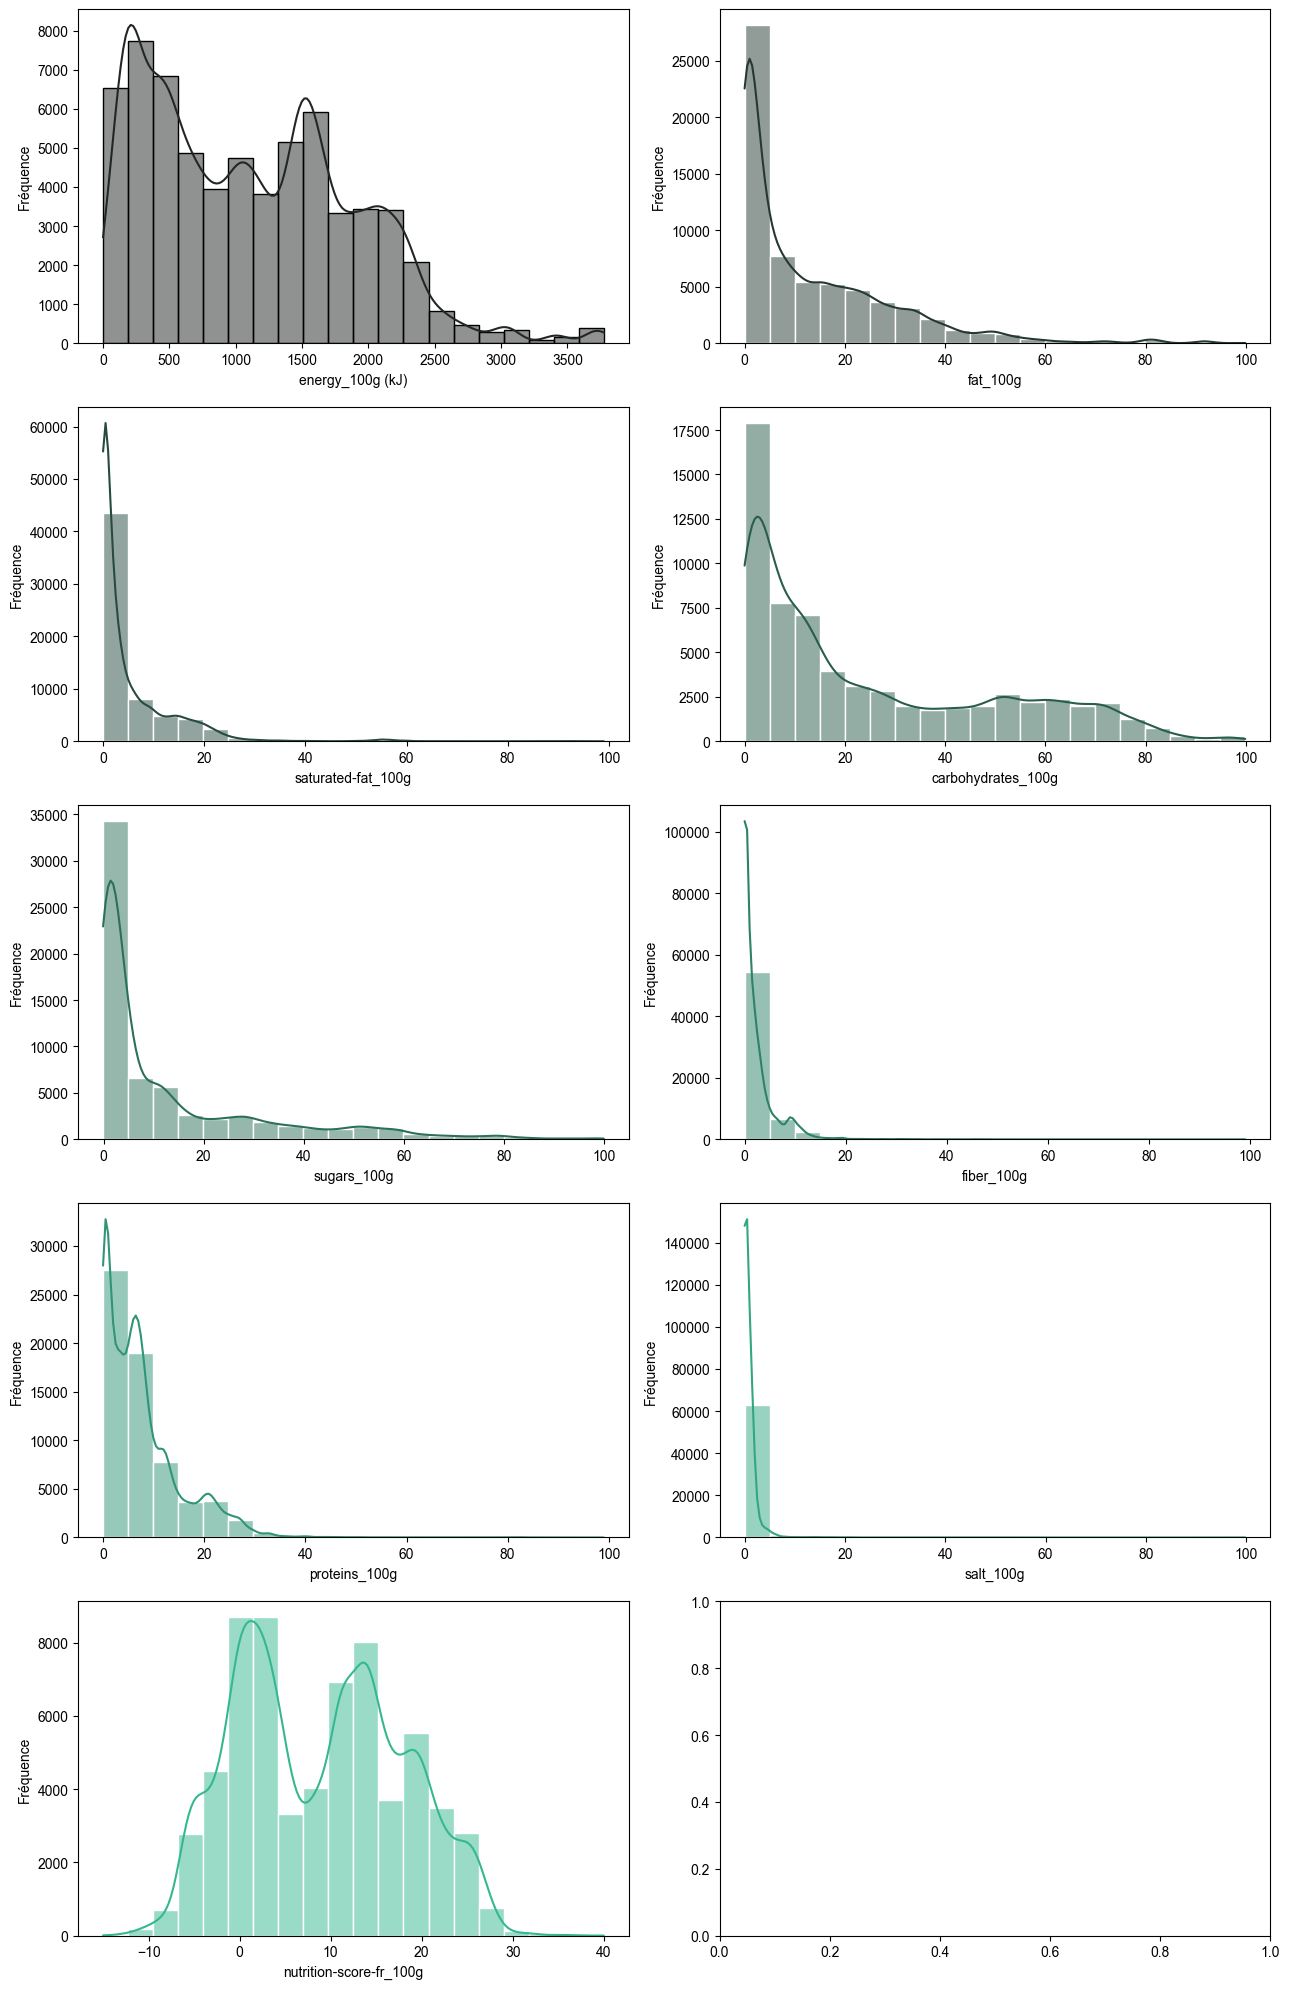

In [14]:
# Set up the figure and axes using Matplotlib
fig, axes = plt.subplots(5, 2, figsize=(13, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()
# Select 5 random colors from your palette
random_colors = sns.color_palette("dark:#35B890", n_colors=len(df_food[col_nutri].columns), as_cmap=False)
# Iterate through each column
for i, col in enumerate(df_food[col_nutri].columns):
    ax = axes[i]  # Select the current subplot
    
    sns.histplot(data=df_food, x=col, bins=20, ax=ax, kde=True, color=random_colors[i])
    ax.set_xlabel(col)
    ax.set_ylabel("Fréquence")
    sns.set_style('whitegrid')  # Set seaborn style
    
plt.tight_layout()  # Adjust subplot layout
plt.show()

### Analyse bivarié

In [15]:
# Select columns containing "100g" or "pnns_groups_2"
df_pairplot = df_food.loc[:, df_food.columns.str.contains("100g") | (df_food.columns == "pnns_groups_2")]

In [16]:
'''
# Set up the figure size
plt.figure(figsize=(15,20))
# Create the pairplot with the custom palette
pairplot = sns.pairplot(df_pairplot, corner=True, hue="pnns_groups_2", palette=palette_map)

# Set the global title
plt.suptitle("Pairplot des variables nutritionnelles - Groupes PNNS", fontsize=20, color="#384B52")

# Display the plot
plt.show()'''

'\n# Set up the figure size\nplt.figure(figsize=(15,20))\n# Create the pairplot with the custom palette\npairplot = sns.pairplot(df_pairplot, corner=True, hue="pnns_groups_2", palette=palette_map)\n\n# Set the global title\nplt.suptitle("Pairplot des variables nutritionnelles - Groupes PNNS", fontsize=20, color="#384B52")\n\n# Display the plot\nplt.show()'

# Correlation

In [17]:
col_nutri = df_food.loc[:, df_food.columns.str.contains("100g")]

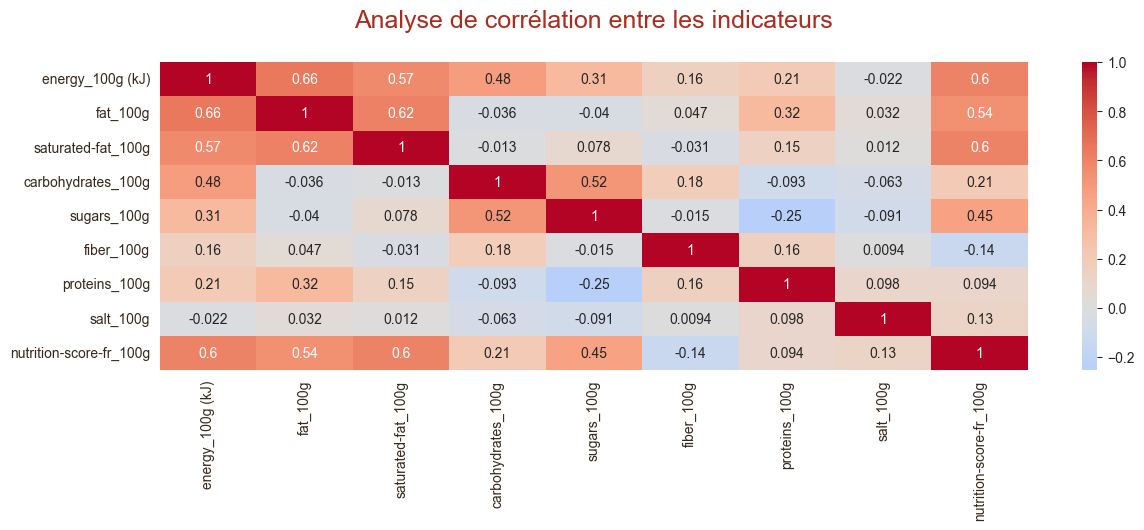

In [18]:
#Analyse des corrélations entre variables
plt.figure(figsize=(14,4))
ax = sns.heatmap(col_nutri.corr(), center=0, cmap='coolwarm', annot=True)
ax.set_title('Analyse de corrélation entre les indicateurs\n', fontsize=18, color='#AA2D21')
plt.xticks(color='#36281B')
plt.yticks(color='#36281B')
plt.show()

In [ ]:
#Analyse des corrélations entre variables
plt.figure(figsize=(14,4))
ax = sns.heatmap(col_nutri.corr(method="spearman"), center=0, cmap='coolwarm', annot=True)
ax.set_title('Analyse de corrélation entre les indicateurs\n', fontsize=18, color='#AA2D21')
plt.xticks(color='#36281B')
plt.yticks(color='#36281B')
plt.show()

# Analyse Groupes PNNS - Analyse univariée

## Groupes PNNS - Nombre de produits par categorie

In [19]:
#Nouveau DF avec les colonnes catégories et produits - Suppresion des doublons pour obtenir les produits uniques
df_produit_categ = df_food[['pnns_groups_2', 'code']].drop_duplicates()
#Calcul du nombre de produits par catégorie
df_produit_categ = df_produit_categ.groupby(by='pnns_groups_2').count().reset_index().sort_values(by="code", ascending=False)

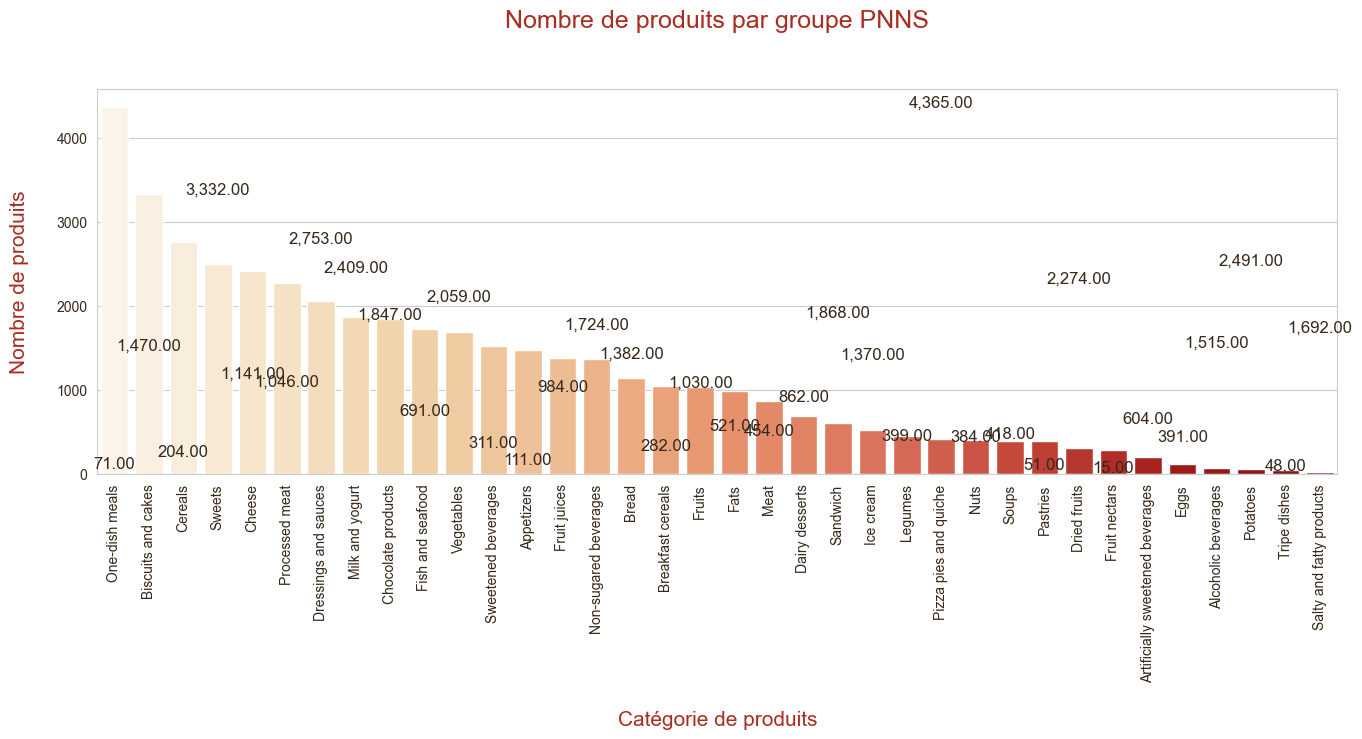

In [20]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_produit_categ, x='pnns_groups_2', y='code', palette="OrRd")

for index, row in df_produit_categ.iterrows():
    ax.text(row.name,row.code, '{:,.2f}'.format(round(row.code,2)), color='#36281B', ha="center", size=12)

ax.set_title("Nombre de produits par groupe PNNS\n\n", fontsize=18, color='#AA2D21')
ax.set_xlabel('\nCatégorie de produits', fontsize=15, color="#AA2D21")
ax.set_ylabel("Nombre de produits\n", fontsize=15, color='#AA2D21')
plt.xticks(color='#36281B', rotation=90)
plt.yticks(color='#36281B')
plt.show()

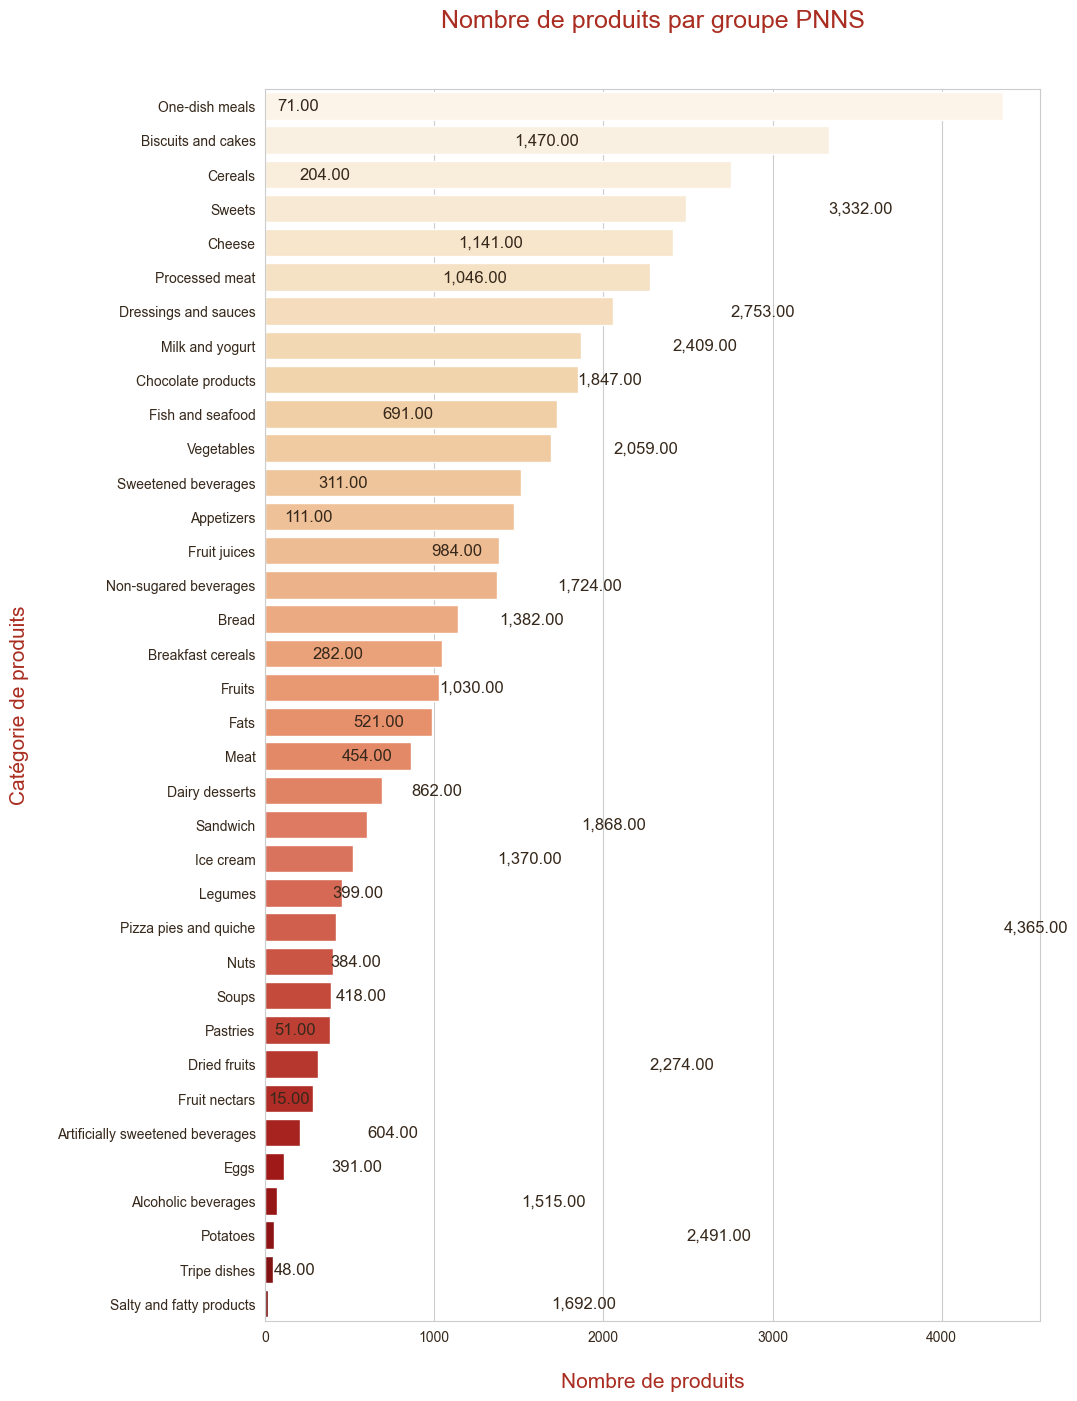

In [21]:
plt.figure(figsize=(10, 16))
ax = sns.barplot(data=df_produit_categ, y='pnns_groups_2', x='code', palette="OrRd")

for index, row in df_produit_categ.iterrows():
    ax.text(row.code, index, '{:,.2f}'.format(round(row.code, 2)), color='#36281B', va="center", ha="left", size=12)

ax.set_title("Nombre de produits par groupe PNNS\n\n", fontsize=18, color='#AA2D21')
ax.set_xlabel('\nNombre de produits', fontsize=15, color="#AA2D21")
ax.set_ylabel("Catégorie de produits\n", fontsize=15, color='#AA2D21')
plt.xticks(color='#36281B')
plt.yticks(color='#36281B')
plt.show()

### Groupes PNNS - Nombre de produit avec huile de palme

In [22]:
df_produit_palme = df_food.loc[df_food["ingredients_from_palm_oil_n"] == 1][['pnns_groups_2', 'code']]

In [23]:
df_produit_palme = df_produit_palme.groupby(by='pnns_groups_2').count().reset_index().sort_values(by="code", ascending=False)

Utiliser un stack ou pie.plot pour comparer les produits qui contiennent huile de palm ou non. 

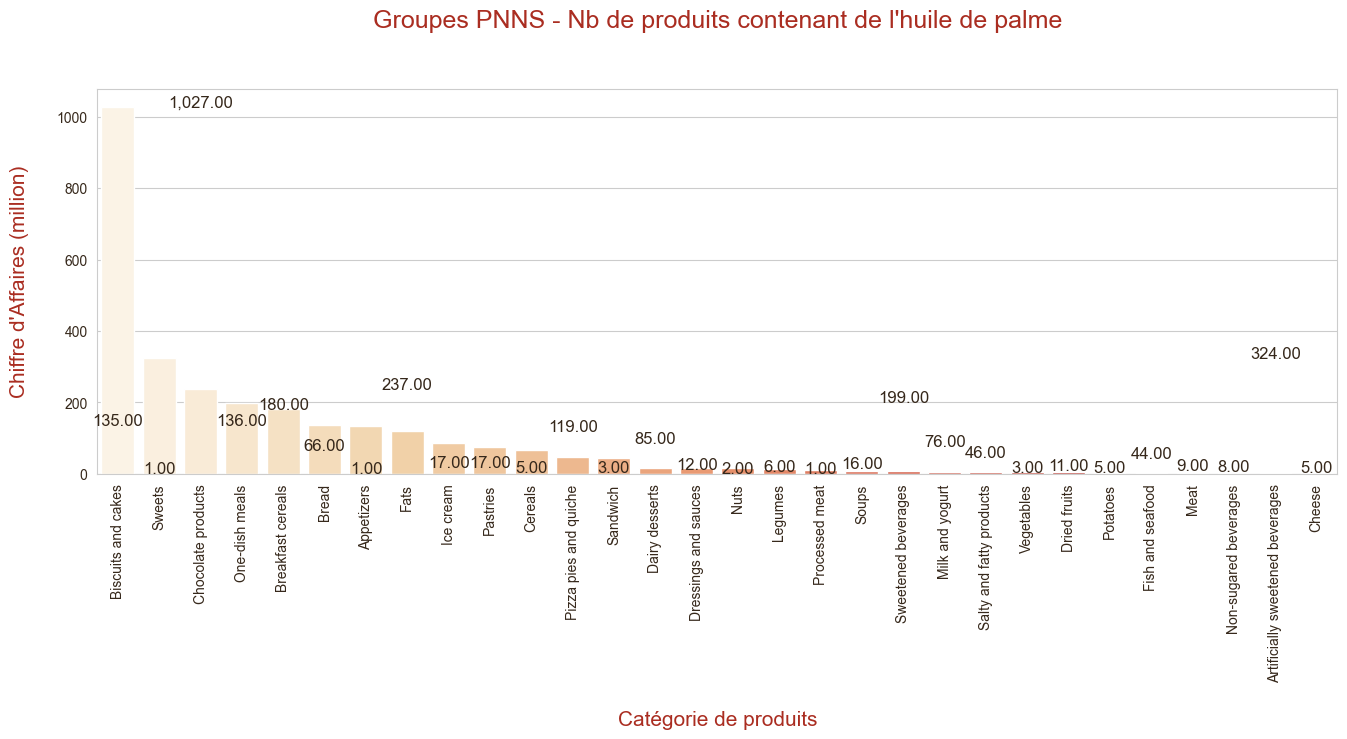

In [24]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_produit_palme, x='pnns_groups_2', y='code', palette="OrRd")

for index, row in df_produit_palme.iterrows():
    ax.text(row.name,row.code, '{:,.2f}'.format(round(row.code,2)), color='#36281B', ha="center", size=12)

ax.set_title("Groupes PNNS - Nb de produits contenant de l'huile de palme\n\n", fontsize=18, color='#AA2D21')
ax.set_xlabel('\nCatégorie de produits', fontsize=15, color="#AA2D21")
ax.set_ylabel("Chiffre d'Affaires (million)\n", fontsize=15, color='#AA2D21')
ax.set_xticklabels(df_produit_palme['pnns_groups_2'])
plt.xticks(color='#36281B', rotation=90)
plt.yticks(color='#36281B')
plt.show()

### Groupes PNNS - Nombre de produit avec allergènes

In [25]:
df_produit_allergen = df_food.loc[df_food["allergens"] == 1][['pnns_groups_2', 'code']]

In [26]:
df_produit_allergen = df_produit_allergen.groupby(by='pnns_groups_2').count().reset_index().sort_values(by="code", ascending=False)

HO: Contenir des allergène et groupes pnns (khi2)

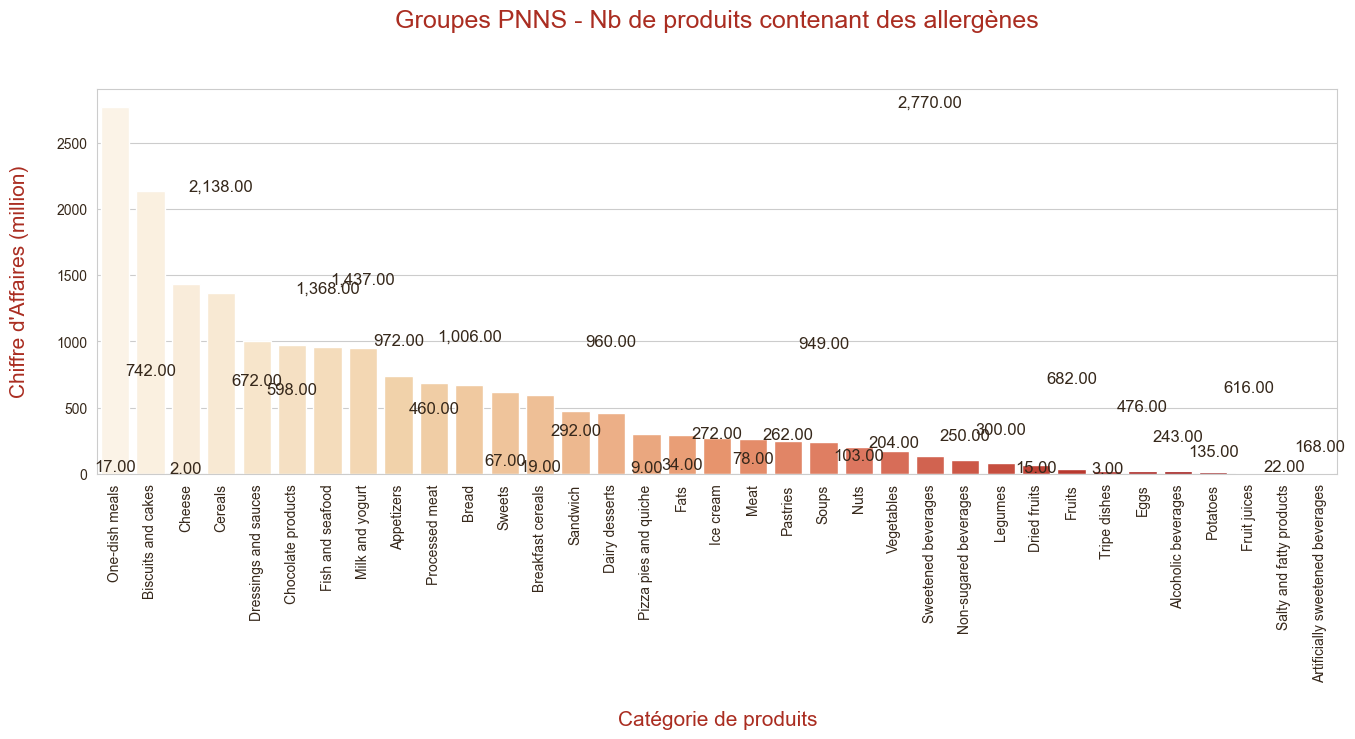

In [27]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_produit_allergen, x='pnns_groups_2', y='code', palette="OrRd")

for index, row in df_produit_allergen.iterrows():
    ax.text(row.name,row.code, '{:,.2f}'.format(round(row.code,2)), color='#36281B', ha="center", size=12)

ax.set_title("Groupes PNNS - Nb de produits contenant des allergènes\n\n", fontsize=18, color='#AA2D21')
ax.set_xlabel('\nCatégorie de produits', fontsize=15, color="#AA2D21")
ax.set_ylabel("Chiffre d'Affaires (million)\n", fontsize=15, color='#AA2D21')
ax.set_xticklabels(df_produit_allergen['pnns_groups_2'])
plt.xticks(color='#36281B', rotation=90)
plt.yticks(color='#36281B')
plt.show()

### Proportion de produit par nutrition grade

In [28]:
#df_food.loc[df_food["nutrition_grade_fr"].notnull()].groupby(by=["nutrition_grade_fr","pnns_groups_2"]).count()

In [29]:
test = df_food.loc[df_food["nutrition_grade_fr"].notnull()][["code","nutrition_grade_fr"]].groupby(by="nutrition_grade_fr").count().reset_index()

In [30]:
grad = df_food.loc[df_food["nutrition_grade_fr"].notnull()][["code","nutrition_grade_fr"]]

H0: groupe aliment et graisse (boxplot)
H0: groupe aliment et sucre 
Rajouter PNNS1 car groupes plus global

# ACP

In [32]:
#Dimension du DataFrame
print(col_nutri.shape)
#Nombre d'observations (tuples/pays)
n = col_nutri.shape[0]
#nombre de variables (colonnes)
p = col_nutri.shape[1]

(64302, 9)


## Centrage et réduction

In [33]:
#Instanciation
sc = StandardScaler()

In [34]:
#Transformation - Centrage-Réduction / Mise à l'échelle (moyenne=0; Ecart-type=1)
X = sc.fit_transform(col_nutri)
print(X)

[[ 0.99903591  0.42469531  0.84916545 ... -0.66868822 -0.27035682
   1.46022538]
 [ 0.4787085  -0.59037317 -0.48487444 ... -0.19057706  0.66920434
   0.17201834]
 [ 0.83077083 -0.83211721 -0.54942476 ... -0.91093121 -0.29268311
   0.57180673]
 ...
 [ 0.68839268 -0.6782218  -0.57333228 ...  0.67002304 -0.11979111
  -1.42713523]
 [ 1.67597927  1.11594219 -0.19917952 ...  1.71804272 -0.26945881
  -0.98292591]
 [-1.41103779 -0.84494182 -0.62114733 ... -0.92368084 -0.28870917
  -0.76082124]]


## Calcul des composantes principales

In [35]:
#Instanciation
acp = PCA(svd_solver='full')
#Calculs des composantes principales + renvoie en sortie les coordonnées factorielles
coord = acp.fit_transform(X)
#Nombre de composantes calculées
print(acp.n_components_)

9


## Eboulis des valeurs propres

### Calcul des valeurs propres

In [36]:
#Variance expliquée - Valeurs propres
print(acp.explained_variance_)

[3.02595262 1.76496396 1.24988339 1.00397882 0.69927919 0.51052967
 0.36016944 0.22308002 0.16230285]


In [37]:
#Valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[3.02590556 1.76493651 1.24986395 1.00396321 0.69926832 0.51052173
 0.36016384 0.22307656 0.16230032]


In [38]:
#Ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n) 

[3.02590556 1.76493651 1.24986395 1.00396321 0.69926832 0.51052173
 0.36016384 0.22307656 0.16230032]


In [39]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [40]:
#Corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#Affiche la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.89172066 -0.08167057  0.19271028 -0.06092935 -0.01565601 -0.24315357
  -0.05837834  0.06940336 -0.29953451]
 [ 0.7684207   0.43486731 -0.00393935 -0.13444075  0.09759913 -0.12743384
  -0.36000444  0.0943125   0.19510817]
 [ 0.76095345  0.28693329 -0.21325286 -0.13416028  0.25897854  0.03673046
   0.43665933  0.10692931  0.06796406]
 [ 0.37306048 -0.71293731  0.35601574  0.10257609 -0.2005174  -0.34834593
   0.13443837 -0.08059167  0.17075245]
 [ 0.40142005 -0.76807189 -0.12017692  0.10185612 -0.09137819  0.38659585
  -0.08370949  0.24272116  0.0195752 ]
 [ 0.06802528 -0.02619825  0.86172185  0.01062286  0.4350976   0.24192884
  -0.01253415 -0.06306508  0.00591768]
 [ 0.24464012  0.57206055  0.43496482  0.04507247 -0.60906872  0.20098858
   0.09297514  0.03855087  0.01342955]
 [ 0.04127177  0.23784925 -0.02396064  0.95763828  0.11019804 -0.0829107
   0.00539733  0.07092603 -0.00132345]
 [ 0.83350317 -0.06403297 -0.30612357  0.15513075 -0.03810893  0.23918228
  -0.05069198 -0.349325

## Représentation des individus - 1er plan factoriel

In [47]:
#Positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-8,8) #Même limites en abscisse
axes.set_ylim(-8,8) #Et en ordonnée
#Placement des étiquettes des observations
for i in range(n):
 plt.scatter(coord[i,0],coord[i,1])
#Ajout des axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
plt.title("Représentation des individus dans le 1er plan factoriel\n", fontsize=18, color='#AA2D21')
plt.xticks(color='#36281B')
plt.yticks(color='#36281B')
plt.show()

KeyboardInterrupt: 

In [42]:
#Contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1) #Calcul des carrés des distances à l'origine des individus
print(pd.DataFrame({'Groupes PNNS':df_food['pnns_groups_2'],'Distance des individus (de l\'origine)':np.round(di,2)}).sort_values(by='Distance des individus (de l\'origine)', ascending=False))

                Groupes PNNS  Distance des individus (de l'origine)
32021                    NaN                                1182.92
31395                    NaN                                 661.68
12657                    NaN                                 654.48
12654                    NaN                                 654.48
12650                    NaN                                 654.48
...                      ...                                    ...
42111                    NaN                                   0.24
22713  Pizza pies and quiche                                   0.24
62579         One-dish meals                                   0.23
40307               Sandwich                                   0.17
62590         One-dish meals                                   0.15

[64302 rows x 2 columns]


## Cercle des corrélations

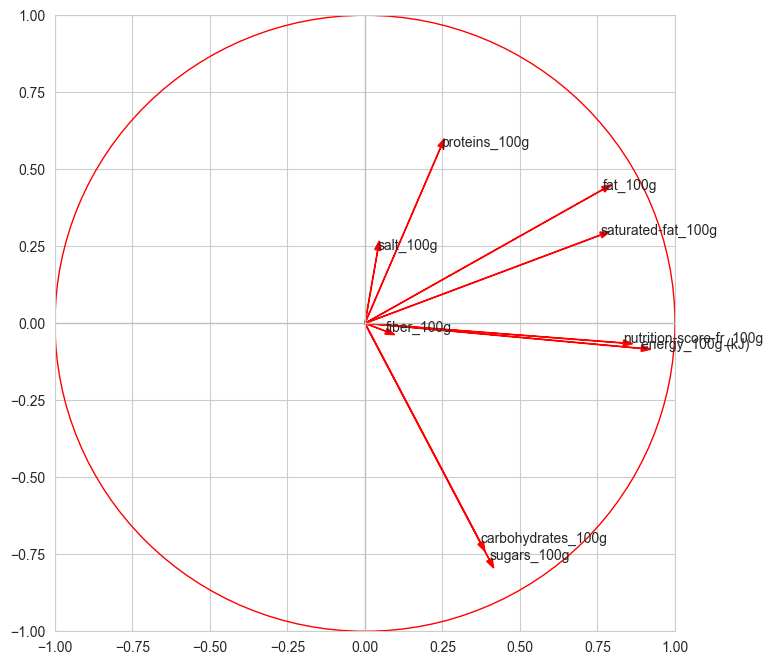

In [43]:
#Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#Affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(col_nutri.columns[j],(corvar[j,0],corvar[j,1]))
 plt.arrow(0,0, corvar[j,0],corvar[j,1], head_width=0.02, color='red')
#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#Ajout du cercle
cercle = plt.Circle((0,0),1,color='red',fill=False)
axes.add_artist(cercle)
#Affichage
plt.show()

# ACP _ Chat GPT

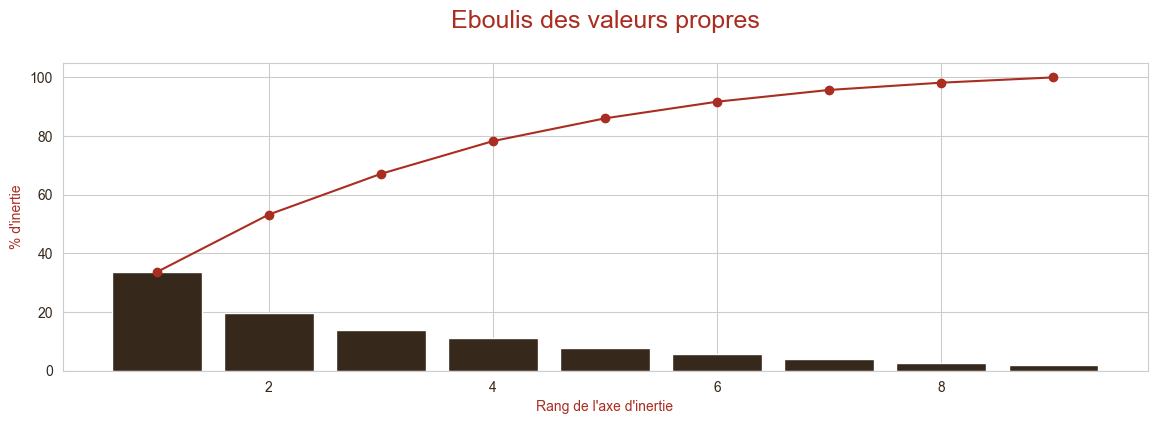

       Ratio    Composante Principale
0  33.621173         energy_100g (kJ)
1  19.610406                 fat_100g
2  13.887377       saturated-fat_100g
3  11.155147       carbohydrates_100g
4   7.769648              sugars_100g
5   5.672464               fiber_100g
6   4.001820            proteins_100g
7   2.478628                salt_100g
8   1.803337  nutrition-score-fr_100g


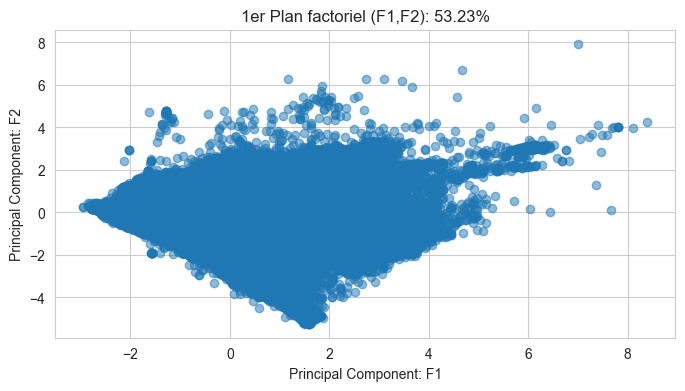

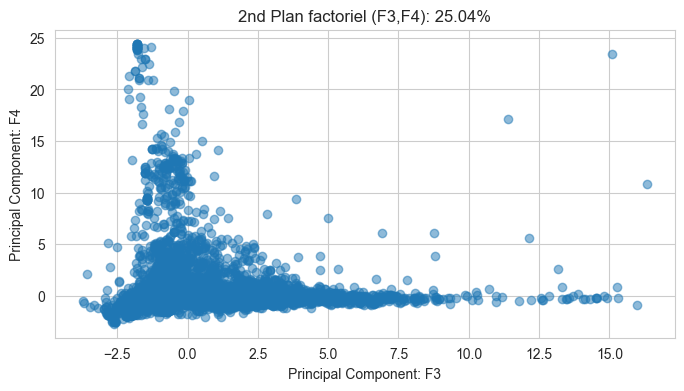

Les 2er plans factoriels expliquent 78.27% des données nutrionnelles


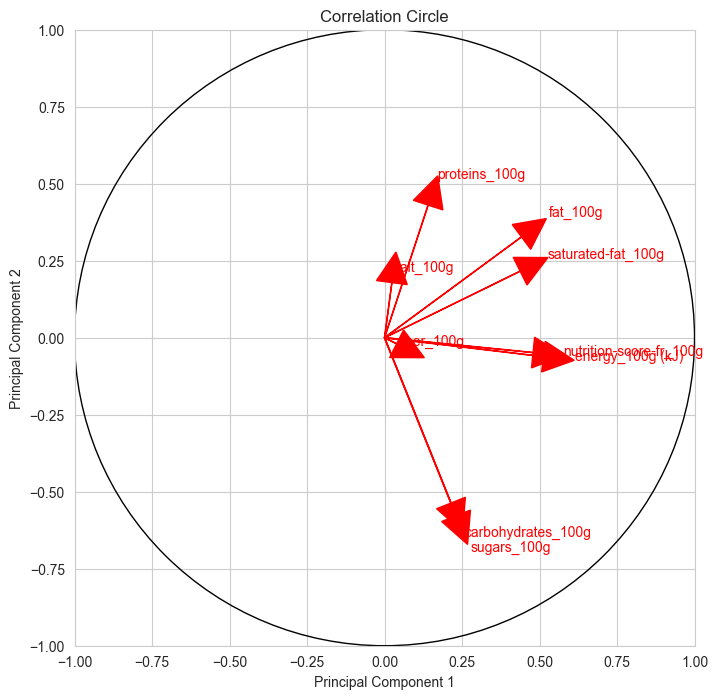

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.DataFrame(col_nutri)

# Standardiser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Effectuer l'ACP
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
#plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
#plt.xlabel('Principal Component')
#plt.ylabel('Explained Variance Ratio')
#plt.title('Explained Variance Ratio by Principal Component')
#plt.show()

#Eboulis des valeurs propres
plt.figure(figsize=(14,4))
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree, color='#36281B')
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="#AA2D21",marker='o')
plt.title("Eboulis des valeurs propres\n", fontsize=18, color='#AA2D21')
plt.xlabel("Rang de l'axe d'inertie", color='#AA2D21')
plt.ylabel("% d'inertie", color='#AA2D21')
plt.xticks(color='#36281B')
plt.yticks(color='#36281B')
plt.show(block=False)

#Contribution des individus dans l'inertie totale
print(pd.DataFrame({'Ratio':acp.explained_variance_ratio_*100,
                    'Composante Principale':col_nutri.columns}))

# Plot first two principal components
plt.figure(figsize=(8, 4))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component: F1')
plt.ylabel('Principal Component: F2')
plt.title("1er Plan factoriel (F1,F2): {:.2f}%".format(scree[0:2].sum()))
plt.show()

# Plot first two principal components
plt.figure(figsize=(8, 4))
plt.scatter(principal_components[:, 2], principal_components[:, 3], alpha=0.5)
plt.xlabel('Principal Component: F3')
plt.ylabel('Principal Component: F4')
plt.title("2nd Plan factoriel (F3,F4): {:.2f}%".format(scree[2:4].sum()))
plt.show()

#Contribution des individus dans l'inertie totale
print("Les 2er plans factoriels expliquent {:.2f}% des données nutrionnelles".format(scree[0:4].sum()))

# Component loadings
component_loadings = pca.components_

# Create a DataFrame for component loadings
loadings_df = pd.DataFrame(
    data=component_loadings,
    columns=df.columns,
    index=[f'PC{i+1}' for i in range(len(component_loadings))]
)

#print("Component Loadings:")
loadings_df

# Plot the correlation circle
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='black')
ax.add_artist(circle)

for i, (x, y) in enumerate(component_loadings.T[:, :2]):
    plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.text(x * 1.2, y * 1.2, df.columns[i], color='red')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Correlation Circle')
plt.show()

Afficher cercle des corrélation pour F3 et F4
Bien mettre en couleur les pnns_groups_1 (le rajouter au data)
Groups PNNS et Nutriments - Faire test statistique adapté avec hypothèse H0
Travailler et chercher support pour l'interprétation du cercle des corrélations